In [90]:
# !pip install tensorflow==2.17.0
import tensorflow as tf

In [91]:
# !apt-get install unrar
# !pip install rarfile

In [92]:
# !pip install beautifulsoup4 lxml

In [93]:
# from google.colab import drive
# drive.mount('/content/drive')

In [94]:
# # giải nén file
# import rarfile

# rar_file_path = '/content/drive/MyDrive/WEEKLY ASIGNMENT - QNT/week-7/EVBCorpus_EVBNews_v2.0.rar'

# with rarfile.RarFile(rar_file_path) as rf:
#     rf.extractall('/content/drive/MyDrive/WEEKLY ASIGNMENT - QNT/week-7/EVBCorpus_extracted')


In [95]:
from bs4 import BeautifulSoup

# Test file SGML
with open('EVBCorpus_EVBNews_v2.0/N0001.sgml', 'r', encoding='utf-8') as file:
    content = file.read()

soup = BeautifulSoup(content, 'lxml')

for tag in soup.find_all():
    print(tag.name, tag.attrs, tag.text)


html {} 
What is a Fenqing ?
EVBCorpus
Quoc-Hung Ngo, Werner Winiwarter
Quoc-Hung Ngo, Werner Winiwarter, 2012. "Building an English-Vietnamese Bilingual Corpus for Machine Translation", 
          In Proceedings of the International Conference on Asian Language Processing 2012 (IALP 2012), pp. 157-160.
22/10/2013


What is a Fenqing ?
Fenqing là gì ?
1-3;2-2;4-1;


Fenqing is a Chinese word which literally means " angry youth " .
Fenqing là một từ tiếng Hoa mà nghĩa đen là " thanh niên phẫn nộ " .
1-1;2-2;3-3;4-5,6;5-4;6-7;7-8,9;8-10;10-14,15;11-12,13;


This word has many translations in English such as cynical youth , young nationalists , hysterical youth and angry young men .
Từ này có nhiều cách dịch sang tiếng Anh như là thanh niên hoài nghi , thanh niên theo chủ nghĩa dân tộc , thanh niên cuồng loạn và thanh niên tức giận .
1-2;2-1;3-3;4-4;5-5,6;6-7;7-8,9;8-10,11;10-14,15;11-12,13;13-17,18;14-20,21,22,23;16-27,28;17-25,26;18-29;19-32,33;20-30,31;


I personally like to call them

In [96]:
# %%capture
# !pip install tensorflow tensorflow-text tensorflow-datasets
# !pip install beautifulsoup4

In [97]:
from bs4 import BeautifulSoup

In [98]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [99]:
# import os
# import re

# # Đường dẫn tới dữ liệu sau khi giải nén
# data_dir = 'EVBCorpus_EVBNews_v2.0'

# def extract_sentences_from_sgml(file_path):
#     """Hàm để trích xuất các câu song ngữ từ file .sgml"""
#     with open(file_path, 'r', encoding='utf-8') as file:
#         content = file.read()

#     # Sử dụng regex để trích xuất phần tiếng Anh và tiếng Việt từ các tag <s>
#     en_sentences = re.findall(r'<s id=\'en\d+\'>(.*?)</s>', content, re.DOTALL)
#     vi_sentences = re.findall(r'<s id=\'vn\d+\'>(.*?)</s>', content, re.DOTALL)

#     return en_sentences, vi_sentences

# # Duyệt qua các file sgml và lưu các cặp câu
# en_sentences = []
# vi_sentences = []

# for filename in os.listdir(data_dir):
#     if filename.endswith('.sgml'):
#         en_sen, vi_sen = extract_sentences_from_sgml(os.path.join(data_dir, filename))
#         en_sentences.extend(en_sen)
#         vi_sentences.extend(vi_sen)

# # Kiểm tra số lượng cặp câu đã thu thập
# print(f"Số lượng câu tiếng Anh: {len(en_sentences)}")
# print(f"Số lượng câu tiếng Việt: {len(vi_sentences)}")

In [100]:
import os
import re

# Đường dẫn tới dữ liệu sau khi giải nén
data_dir = 'EVBCorpus_EVBNews_v2.0'

def extract_sentences_from_sgml(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()

    en_sentences = re.findall(r'<s id=\'en\d+\'>(.*?)</s>', content, re.DOTALL)
    vi_sentences = re.findall(r'<s id=\'vn\d+\'>(.*?)</s>', content, re.DOTALL)

    return en_sentences, vi_sentences

def process_files(data_dir, limit_files=True):
    en_sentences = []
    vi_sentences = []
    file_count = 0

    for filename in os.listdir(data_dir):
        if filename.endswith('.sgml'):
            if limit_files and file_count >= 250:
                break
            en_sen, vi_sen = extract_sentences_from_sgml(os.path.join(data_dir, filename))
            en_sentences.extend(en_sen)
            vi_sentences.extend(vi_sen)
            file_count += 1

    print(f"Số lượng câu tiếng Anh: {len(en_sentences)}")
    print(f"Số lượng câu tiếng Việt: {len(vi_sentences)}")

    return en_sentences, vi_sentences

# Gọi hàm với tùy chọn lấy 100 file đầu tiên
en_sentences, vi_sentences = process_files(data_dir, limit_files=True)  # limit_files=False để chạy hết dataset

Số lượng câu tiếng Anh: 9051
Số lượng câu tiếng Việt: 9051


In [101]:
# In 5 cặp câu đầu tiên
for en, vi in zip(en_sentences[:5], vi_sentences[:5]):
    print(f"EN: {en}\nVI: {vi}\n")

EN: What is a Fenqing ?
VI: Fenqing là gì ?

EN: Fenqing is a Chinese word which literally means " angry youth " .
VI: Fenqing là một từ tiếng Hoa mà nghĩa đen là " thanh niên phẫn nộ " .

EN: This word has many translations in English such as cynical youth , young nationalists , hysterical youth and angry young men .
VI: Từ này có nhiều cách dịch sang tiếng Anh như là thanh niên hoài nghi , thanh niên theo chủ nghĩa dân tộc , thanh niên cuồng loạn và thanh niên tức giận .

EN: I personally like to call them mob youth or ignorant angry youth .
VI: Cá nhân tôi thích gọi chúng là bọn thanh niên du thủ du thực hoặc thanh niên phẫn nộ và ngu dốt .

EN: It is impossible to understand China without knowing what Fenqing is and what role they play in the society in today 's China .
VI: Không thể hiểu được Trung Quốc nếu không biết Fenqing là gì và họ đóng vai trò gì trong xã hội Trung Quốc ngày nay .



In [102]:
# %%capture
# !pip install tensorflow-text==2.13.0

In [103]:
# import tensorflow_text as text

In [104]:
max_en_length = len(en_sentences)
max_vi_length = len(vi_sentences)

In [105]:
max_en_length

9051

In [106]:
max_vi_length

9051

In [107]:
print(en_sentences[1])
print(vi_sentences[1])

Fenqing is a Chinese word which literally means " angry youth " .
Fenqing là một từ tiếng Hoa mà nghĩa đen là " thanh niên phẫn nộ " .


In [108]:
print(en_sentences[2])
print(vi_sentences[2])

This word has many translations in English such as cynical youth , young nationalists , hysterical youth and angry young men .
Từ này có nhiều cách dịch sang tiếng Anh như là thanh niên hoài nghi , thanh niên theo chủ nghĩa dân tộc , thanh niên cuồng loạn và thanh niên tức giận .


In [109]:
########################################################## Preprocessing #######################################################################

In [110]:
# %%capture
# !pip install tensorflow

In [111]:
from sklearn.model_selection import train_test_split

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra với tỷ lệ 90% và 10%
eng_training_data, eng_testing_data, vie_training_data, vie_testing_data = train_test_split(
    en_sentences, vi_sentences, test_size=0.1, shuffle=True, random_state=42
)

In [112]:
from tensorflow.keras.preprocessing.text import Tokenizer
# Khởi tạo tokenizer cho ngôn ngữ tiếng Anh và thực hiện fitting
eng_text_tokenizer = Tokenizer(num_words=15000, filters='', lower=False, oov_token='<oov>')
eng_text_tokenizer.fit_on_texts(eng_training_data)

# Khởi tạo tokenizer cho ngôn ngữ tiếng Việt và thực hiện fitting
vie_text_tokenizer = Tokenizer(num_words=15000, filters='', lower=False, oov_token='<oov>')
vie_text_tokenizer.fit_on_texts(vie_training_data)

In [113]:
len(eng_text_tokenizer.word_index)

16468

In [114]:
len(vie_text_tokenizer.word_index)

7506

In [115]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [116]:
eng_training_sequences = eng_text_tokenizer.texts_to_sequences(eng_training_data)
vie_training_sequences = vie_text_tokenizer.texts_to_sequences(vie_training_data)


In [117]:
longest_eng_seq, longest_vie_seq = max(map(len, eng_training_sequences)), max(map(len, vie_training_sequences))

print(f'Longest English sequence length: {longest_eng_seq}')
print(f'Longest Vietnamese sequence length: {longest_vie_seq}')

Longest English sequence length: 128
Longest Vietnamese sequence length: 162


In [118]:
# Padding
eng_padded_training = pad_sequences(eng_training_sequences, maxlen=longest_eng_seq, padding='post')
vie_padded_training = pad_sequences(vie_training_sequences, maxlen=longest_vie_seq, padding='post')


In [119]:
# chuẩn bị dữ liệu thành các batch
def batch_preparation(english_sequences, vietnamese_sequences):
    eng_tensor = tf.convert_to_tensor(english_sequences)
    vie_input_tensor = tf.convert_to_tensor(vietnamese_sequences[:, :-1])
    vie_label_tensor = tf.convert_to_tensor(vietnamese_sequences[:, 1:])
    return (eng_tensor, vie_input_tensor), vie_label_tensor

In [120]:

eng_final_train, eng_validation, vie_final_train, vie_validation = train_test_split(
    eng_padded_training, vie_padded_training, test_size=0.1, shuffle=True, random_state=42
)

In [121]:
BATCH_SIZE = 64
# BATCH_SIZE = 32 # reduce batch size to solve "error message ResourceExhaustedError: Out of memory indicates that the program is trying to allocate more memory than is available on the device (GPU or RAM)"
train_dataset_batches = tf.data.Dataset.from_tensor_slices((eng_final_train, vie_final_train)) \
    .batch(BATCH_SIZE).map(batch_preparation)
validation_dataset_batches = tf.data.Dataset.from_tensor_slices((eng_validation, vie_validation)) \
    .batch(BATCH_SIZE).map(batch_preparation)

In [122]:
for (vi, en), en_labels in train_dataset_batches.take(1):
  break

print(vi.shape)
print(en.shape)
print(en_labels.shape)

(64, 128)
(64, 161)
(64, 161)


In [123]:
print(en[0][:10])
print(en_labels[0][:10])

tf.Tensor([1369   43    3  201  245    5   22    6 1219 2212], shape=(10,), dtype=int32)
tf.Tensor([  43    3  201  245    5   22    6 1219 2212 1418], shape=(10,), dtype=int32)


In [124]:
################################################# Define the components ###############################################

In [125]:
def positional_encoding(length, depth):
  depth = depth/2

  positions = np.arange(length)[:, np.newaxis]     # (seq, 1)
  depths = np.arange(depth)[np.newaxis, :]/depth   # (1, depth)

  angle_rates = 1 / (10000**depths)         # (1, depth)
  angle_rads = positions * angle_rates      # (pos, depth)

  pos_encoding = np.concatenate(
      [np.sin(angle_rads), np.cos(angle_rads)],
      axis=-1)

  return tf.cast(pos_encoding, dtype=tf.float32)

In [126]:
import matplotlib.pyplot as plt

In [127]:
import numpy as np

(2048, 512)


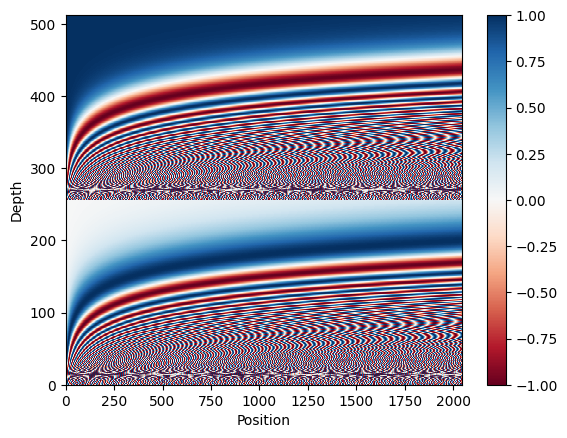

In [128]:
pos_encoding = positional_encoding(length=2048, depth=512)

# Check the shape.
print(pos_encoding.shape)

# Plot
plt.pcolormesh(pos_encoding.numpy().T, cmap='RdBu')
plt.ylabel('Depth')
plt.xlabel('Position')
plt.colorbar()
plt.show()

Trục x: vị trí hoặc vị trí của các input tokens
Trục y:  độ sâu hoặc số chiều encoding dimensions.

Thang màu biểu thị các giá trị của mã hóa vị trí, màu xanh = giá trị âm và màu đỏ = giá trị dương.

(0.0, 1.0)

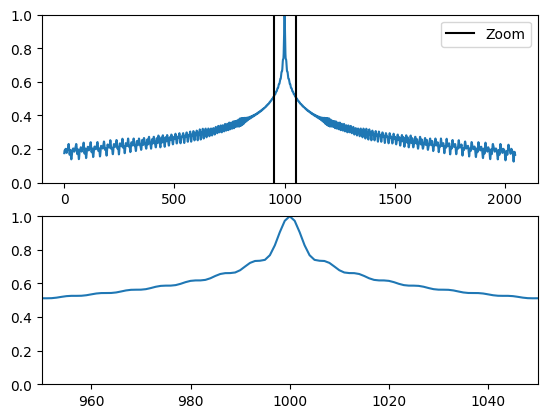

In [129]:
pos_encoding/=tf.norm(pos_encoding, axis=1, keepdims=True)
p = pos_encoding[1000]
dots = tf.einsum('pd,d -> p', pos_encoding, p)
plt.subplot(2,1,1)
plt.plot(dots)
plt.ylim([0,1])
plt.plot([950, 950, float('nan'), 1050, 1050],
         [0,1,float('nan'),0,1], color='k', label='Zoom')
plt.legend()
plt.subplot(2,1,2)
plt.plot(dots)
plt.xlim([950, 1050])
plt.ylim([0,1])

mức độ tương đồng cao nhất với chính nó (vị trí 1000) và giảm dần khi di chuyển ra khỏi vị trí này theo cả 2 hướng

tính độ tương tự giữa các vị trí bằng cách tính tích vô hướng (dot product) giữa vector positional encoding của một từ với các vector của các từ còn lại

Ví dụ: "Tôi yêu Việt Nam".
Mô hình sẽ tạo ra các vector positional encoding cho từng từ. Vector của từ "Việt Nam" sẽ có giá trị khác với vector của từ "Tôi" vì chúng ở các vị trí khác nhau trong câu.

Khi tính toán độ tương tự, ta sẽ thấy rằng:

Độ tương tự giữa "Việt Nam" và chính nó là cao nhất, vì chúng ở cùng một vị trí.
Độ tương tự giữa "Việt Nam" và "Yêu" sẽ thấp hơn một chút, vì chúng cách nhau một từ.
Độ tương tự giữa "Việt Nam" và "Tôi" sẽ thấp hơn nữa, vì chúng cách nhau hai từ.

The positional encoding in a transformer model helps the model capture positional information about the input sequence.
The dot product between the positional encoding of a specific element and the positional encodings of other elements can be seen as a measure of how similar the positions of these elements are.

In [130]:
class PositionalEmbedding(tf.keras.layers.Layer):
  def __init__(self, vocab_size, d_model):
    super().__init__()
    self.d_model = d_model
    self.embedding = tf.keras.layers.Embedding(vocab_size, d_model, mask_zero=True)
    self.pos_encoding = positional_encoding(length=2048, depth=d_model)

  def compute_mask(self, *args, **kwargs):
    return self.embedding.compute_mask(*args, **kwargs)

  def call(self, x):
    length = tf.shape(x)[1]
    x = self.embedding(x)
    # This factor sets the relative scale of the embedding and positonal_encoding.
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x = x + self.pos_encoding[tf.newaxis, :length, :]
    return x

In [131]:
vocab_size_eng = len(eng_text_tokenizer.word_index) + 1  # +1 cho <oov> hoặc <pad>
vocab_size_vie = len(vie_text_tokenizer.word_index) + 1  # +1 cho <oov> hoặc <pad>

# tìm hiểu thêm cách chọn vocal_size
# vocab_size=10000

In [132]:
embed_vi = PositionalEmbedding(vocab_size=vocab_size_eng, d_model=512)
embed_en = PositionalEmbedding(vocab_size=vocab_size_vie, d_model=512)

vi_emb = embed_vi(vi)
en_emb = embed_en(en)

In [133]:
en_emb._keras_mask

<tf.Tensor: shape=(64, 161), dtype=bool, numpy=
array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])>

In [134]:
##################################################### Add and normalize ############################################

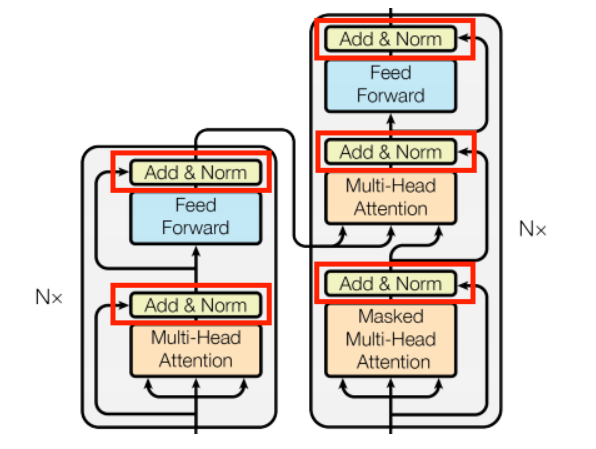

In [135]:
##################################################### The base attention layer ############################################

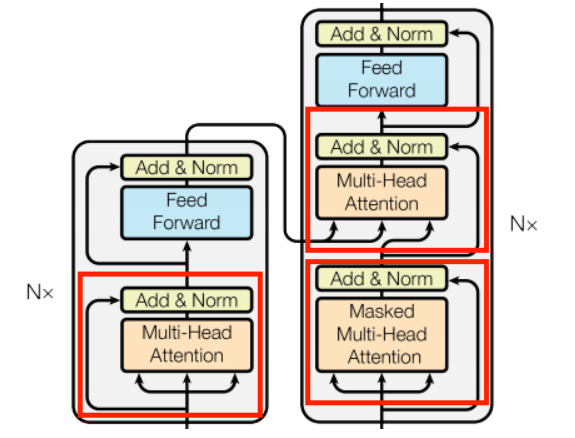

In [136]:
class BaseAttention(tf.keras.layers.Layer):
  def __init__(self, **kwargs):
    super().__init__()
    self.mha = tf.keras.layers.MultiHeadAttention(**kwargs)
    self.layernorm = tf.keras.layers.LayerNormalization()
    self.add = tf.keras.layers.Add()

In [137]:
##################################################### Attention refresher ############################################

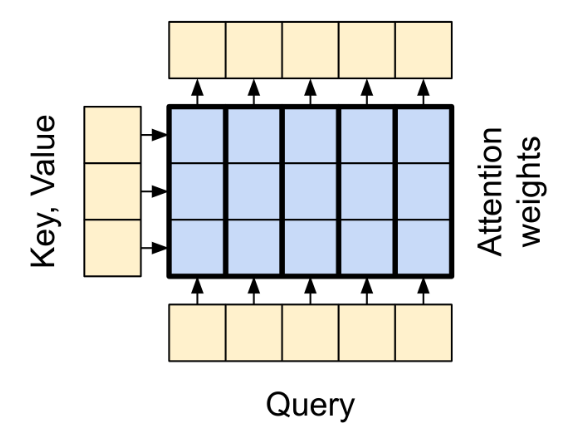

In [138]:
##################################################### The cross attention layer ############################################

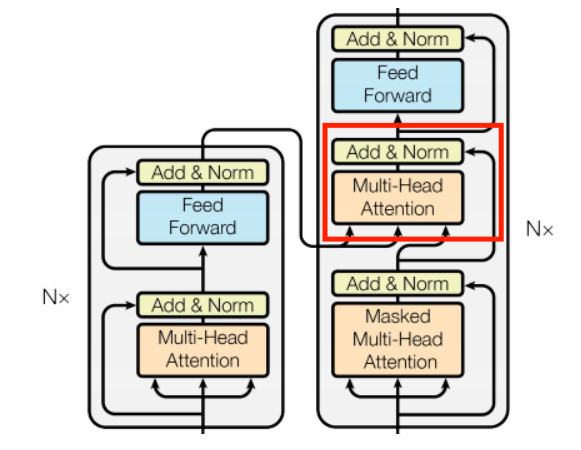

In [139]:
class CrossAttention(BaseAttention):
  def call(self, x, context):
    attn_output, attn_scores = self.mha(
        query=x,
        key=context,
        value=context,
        return_attention_scores=True)

    # Cache the attention scores for plotting later.
    self.last_attn_scores = attn_scores

    x = self.add([x, attn_output])
    x = self.layernorm(x)

    return x

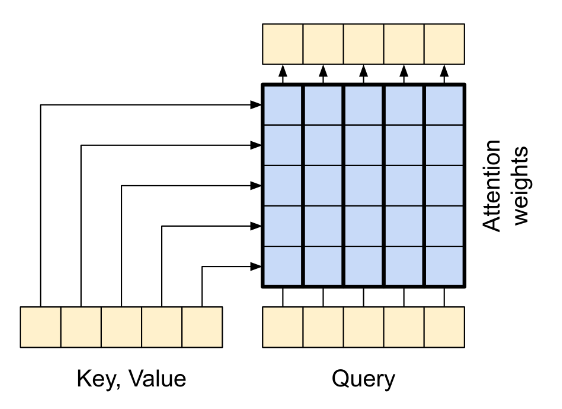

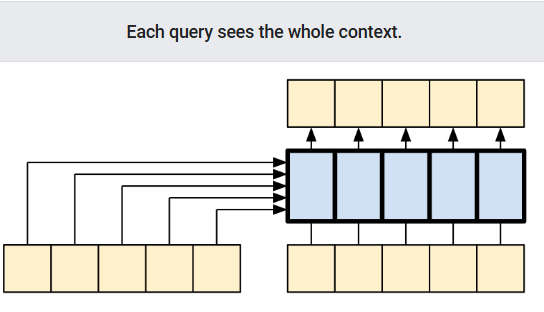

In [140]:
sample_ca = CrossAttention(num_heads=2, key_dim=512)

print(vi_emb.shape)
print(en_emb.shape)
print(sample_ca(en_emb, vi_emb).shape)

(64, 128, 512)
(64, 161, 512)
(64, 161, 512)


c:\Users\NTN8HC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:932: UserWarning: Layer 'cross_attention_10' (of type CrossAttention) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [141]:
##################################################### The global self-attention layer ############################################

In [142]:
class GlobalSelfAttention(BaseAttention):
  def call(self, x):
    attn_output = self.mha(
        query=x,
        value=x,
        key=x)
    x = self.add([x, attn_output])
    x = self.layernorm(x)
    return x

In [143]:
sample_gsa = GlobalSelfAttention(num_heads=2, key_dim=512)

print(vi_emb.shape)
print(sample_gsa(vi_emb).shape)

(64, 128, 512)
(64, 128, 512)


c:\Users\NTN8HC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:932: UserWarning: Layer 'global_self_attention_10' (of type GlobalSelfAttention) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [144]:
##################################################### The causal self-attention layer ############################################

In [145]:
class CausalSelfAttention(BaseAttention):
  def call(self, x):
    attn_output = self.mha(
        query=x,
        value=x,
        key=x,
        use_causal_mask = True)
    x = self.add([x, attn_output])
    x = self.layernorm(x)
    return x

In [146]:
sample_csa = CausalSelfAttention(num_heads=2, key_dim=512)

print(en_emb.shape)
print(sample_csa(en_emb).shape)

(64, 161, 512)
(64, 161, 512)


c:\Users\NTN8HC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:932: UserWarning: Layer 'causal_self_attention_10' (of type CausalSelfAttention) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [147]:
out1 = sample_csa(embed_en(en[:, :3]))
out2 = sample_csa(embed_en(en))[:, :3]

tf.reduce_max(abs(out1 - out2)).numpy()

0.16149259

In [148]:
##################################################### The feed forward network ############################################

In [149]:
class FeedForward(tf.keras.layers.Layer):
  def __init__(self, d_model, dff, dropout_rate=0.1):
    super().__init__()
    self.seq = tf.keras.Sequential([
      tf.keras.layers.Dense(dff, activation='relu'),
      tf.keras.layers.Dense(d_model),
      tf.keras.layers.Dropout(dropout_rate)
    ])
    self.add = tf.keras.layers.Add()
    self.layer_norm = tf.keras.layers.LayerNormalization()

  def call(self, x):
    x = self.add([x, self.seq(x)])
    x = self.layer_norm(x)
    return x

In [150]:
sample_ffn = FeedForward(512, 2048)

print(en_emb.shape)
print(sample_ffn(en_emb).shape)

(64, 161, 512)
(64, 161, 512)


c:\Users\NTN8HC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:932: UserWarning: Layer 'sequential_19' (of type Sequential) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
c:\Users\NTN8HC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:932: UserWarning: Layer 'feed_forward_19' (of type FeedForward) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [151]:
##################################################### The encoder layer ############################################

In [152]:
class EncoderLayer(tf.keras.layers.Layer):
  def __init__(self,*, d_model, num_heads, dff, dropout_rate=0.1):
    super().__init__()

    self.self_attention = GlobalSelfAttention(
        num_heads=num_heads,
        key_dim=d_model,
        dropout=dropout_rate)

    self.ffn = FeedForward(d_model, dff)

  def call(self, x):
    x = self.self_attention(x)
    x = self.ffn(x)
    return x

In [153]:
sample_encoder_layer = EncoderLayer(d_model=512, num_heads=8, dff=2048)

print(vi_emb.shape)
print(sample_encoder_layer(vi_emb).shape)

(64, 128, 512)


c:\Users\NTN8HC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:932: UserWarning: Layer 'global_self_attention_11' (of type GlobalSelfAttention) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
c:\Users\NTN8HC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:932: UserWarning: Layer 'sequential_20' (of type Sequential) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
c:\Users\NTN8HC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:932: UserWarning: Layer 'feed_forward_20' (of type FeedForward) was passed an input with a mask attached to it. However, this layer does not support masking a

(64, 128, 512)


c:\Users\NTN8HC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:932: UserWarning: Layer 'encoder_layer_9' (of type EncoderLayer) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [154]:
##################################################### The encoder ############################################

In [155]:
class Encoder(tf.keras.layers.Layer):
  def __init__(self, *, num_layers, d_model, num_heads,
               dff, vocab_size, dropout_rate=0.1):
    super().__init__()

    self.d_model = d_model
    self.num_layers = num_layers

    self.pos_embedding = PositionalEmbedding(vocab_size=15000, d_model=d_model) # Increase vocab_size to at least 9711 + 1
    # self.pos_embedding = PositionalEmbedding(
    #     vocab_size=vocab_size, d_model=d_model)

    self.enc_layers = [
        EncoderLayer(d_model=d_model,
                     num_heads=num_heads,
                     dff=dff,
                     dropout_rate=dropout_rate)
        for _ in range(num_layers)]
    self.dropout = tf.keras.layers.Dropout(dropout_rate)

  def call(self, x):
    # `x` is token-IDs shape: (batch, seq_len)
    x = self.pos_embedding(x)  # Shape `(batch_size, seq_len, d_model)`.

    # Add dropout.
    x = self.dropout(x)

    for i in range(self.num_layers):
      x = self.enc_layers[i](x)

    return x  # Shape `(batch_size, seq_len, d_model)`.

In [156]:
# Instantiate the encoder.
sample_encoder = Encoder(num_layers=4,
                         d_model=512,
                         num_heads=8,
                         dff=2048,
                         vocab_size=8500)

sample_encoder_output = sample_encoder(vi, training=False)

# Print the shape.
print(vi.shape)
print(sample_encoder_output.shape)  # Shape `(batch_size, input_seq_len, d_model)`.

c:\Users\NTN8HC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:932: UserWarning: Layer 'global_self_attention_12' (of type GlobalSelfAttention) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
c:\Users\NTN8HC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:932: UserWarning: Layer 'sequential_21' (of type Sequential) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
c:\Users\NTN8HC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:932: UserWarning: Layer 'feed_forward_21' (of type FeedForward) was passed an input with a mask attached to it. However, this layer does not support masking a

(64, 128)
(64, 128, 512)


In [157]:
##################################################### The decoder layer ############################################

In [158]:
class DecoderLayer(tf.keras.layers.Layer):
  def __init__(self,
               *,
               d_model,
               num_heads,
               dff,
               dropout_rate=0.1):
    super(DecoderLayer, self).__init__()

    self.causal_self_attention = CausalSelfAttention(
        num_heads=num_heads,
        key_dim=d_model,
        dropout=dropout_rate)

    self.cross_attention = CrossAttention(
        num_heads=num_heads,
        key_dim=d_model,
        dropout=dropout_rate)

    self.ffn = FeedForward(d_model, dff)

  def call(self, x, context):
    x = self.causal_self_attention(x=x)
    x = self.cross_attention(x=x, context=context)

    # Cache the last attention scores for plotting later
    self.last_attn_scores = self.cross_attention.last_attn_scores

    x = self.ffn(x)  # Shape `(batch_size, seq_len, d_model)`.
    return x

In [159]:
sample_decoder_layer = DecoderLayer(d_model=512, num_heads=8, dff=2048)

sample_decoder_layer_output = sample_decoder_layer(
    x=en_emb, context=vi_emb)

print(en_emb.shape)
print(vi_emb.shape)
print(sample_decoder_layer_output.shape)  # `(batch_size, seq_len, d_model)`

c:\Users\NTN8HC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:932: UserWarning: Layer 'causal_self_attention_11' (of type CausalSelfAttention) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
c:\Users\NTN8HC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:932: UserWarning: Layer 'cross_attention_11' (of type CrossAttention) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
c:\Users\NTN8HC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:932: UserWarning: Layer 'sequential_25' (of type Sequential) was passed an input with a mask attached to it. However, this layer does not support mas

(64, 161, 512)
(64, 128, 512)
(64, 161, 512)


c:\Users\NTN8HC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:932: UserWarning: Layer 'decoder_layer_9' (of type DecoderLayer) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [160]:
##################################################### The decoder ############################################

In [161]:
class Decoder(tf.keras.layers.Layer):
  def __init__(self, *, num_layers, d_model, num_heads, dff, vocab_size,
               dropout_rate=0.1):
    super(Decoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers

    self.pos_embedding = PositionalEmbedding(vocab_size=vocab_size,
                                             d_model=d_model)
    self.dropout = tf.keras.layers.Dropout(dropout_rate)
    self.dec_layers = [
        DecoderLayer(d_model=d_model, num_heads=num_heads,
                     dff=dff, dropout_rate=dropout_rate)
        for _ in range(num_layers)]

    self.last_attn_scores = None

  def call(self, x, context):
    # `x` is token-IDs shape (batch, target_seq_len)
    x = self.pos_embedding(x)  # (batch_size, target_seq_len, d_model)

    x = self.dropout(x)

    for i in range(self.num_layers):
      x  = self.dec_layers[i](x, context)

    self.last_attn_scores = self.dec_layers[-1].last_attn_scores

    # The shape of x is (batch_size, target_seq_len, d_model).
    return x

In [162]:
# Instantiate the decoder.
sample_decoder = Decoder(num_layers=4,
                         d_model=512,
                         num_heads=8,
                         dff=2048,
                         vocab_size=8000)

en = tf.clip_by_value(en, 0, sample_decoder.pos_embedding.embedding.input_dim - 1)

output = sample_decoder(
    x=en,
    context=vi_emb)

# Print the shapes.
print(en.shape)
print(vi_emb.shape)
print(output.shape)

c:\Users\NTN8HC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:932: UserWarning: Layer 'causal_self_attention_12' (of type CausalSelfAttention) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
c:\Users\NTN8HC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:932: UserWarning: Layer 'cross_attention_12' (of type CrossAttention) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
c:\Users\NTN8HC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:932: UserWarning: Layer 'sequential_26' (of type Sequential) was passed an input with a mask attached to it. However, this layer does not support mas

(64, 161)
(64, 128, 512)
(64, 161, 512)


In [163]:
sample_decoder.last_attn_scores.shape  # (batch, heads, target_seq, input_seq)

TensorShape([64, 8, 161, 128])

In [164]:
##################################################### The Transformer ############################################

In [165]:
class Transformer(tf.keras.Model):
  def __init__(self, *, num_layers, d_model, num_heads, dff,
               input_vocab_size, target_vocab_size, dropout_rate=0.1):
    super().__init__()
    self.encoder = Encoder(num_layers=num_layers, d_model=d_model,
                           num_heads=num_heads, dff=dff,
                           vocab_size=input_vocab_size,
                           dropout_rate=dropout_rate)

    self.decoder = Decoder(num_layers=num_layers, d_model=d_model,
                           num_heads=num_heads, dff=dff,
                           vocab_size=target_vocab_size,
                           dropout_rate=dropout_rate)

    self.final_layer = tf.keras.layers.Dense(target_vocab_size)

  def call(self, inputs):
    # To use a Keras model with `.fit` you must pass all your inputs in the
    # first argument.
    context, x  = inputs

    context = self.encoder(context)  # (batch_size, context_len, d_model)

    x = self.decoder(x, context)  # (batch_size, target_len, d_model)

    # Final linear layer output.
    logits = self.final_layer(x)  # (batch_size, target_len, target_vocab_size)

    try:
      # Drop the keras mask, so it doesn't scale the losses/metrics.
      # b/250038731
      del logits._keras_mask
    except AttributeError:
      pass

    # Return the final output and the attention weights.
    return logits

In [166]:
num_layers = 4
d_model = 128
dff = 512
num_heads = 8
dropout_rate = 0.1

In [167]:
# vocab_size_eng = len(eng_text_tokenizer.word_index) + 1  # +1 cho <oov> hoặc <pad>
# vocab_size_vie = len(vie_text_tokenizer.word_index) + 1  # +1 cho <oov> hoặc <pad>

In [168]:
transformer = Transformer(
    num_layers=num_layers,
    d_model=d_model,
    num_heads=num_heads,
    dff=dff,
    input_vocab_size= vocab_size_vie,
    target_vocab_size= vocab_size_eng,
    dropout_rate=dropout_rate)

In [169]:
output = transformer((vi, en))

print(en.shape)
print(vi.shape)
print(output.shape)

c:\Users\NTN8HC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:932: UserWarning: Layer 'global_self_attention_16' (of type GlobalSelfAttention) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
c:\Users\NTN8HC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:932: UserWarning: Layer 'sequential_30' (of type Sequential) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
c:\Users\NTN8HC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:932: UserWarning: Layer 'feed_forward_30' (of type FeedForward) was passed an input with a mask attached to it. However, this layer does not support masking a

(64, 161)
(64, 128)
(64, 161, 16469)


In [170]:
attn_scores = transformer.decoder.dec_layers[-1].last_attn_scores
print(attn_scores.shape)  # (batch, heads, target_seq, input_seq)

(64, 8, 161, 128)


In [171]:
transformer.summary()

Model: "transformer_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_3 (Encoder)             │ ?                      │     4,558,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_3 (Decoder)             │ ?                      │     6,857,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (64, 161, 16469)       │     2,124,501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,541,205 (51.66 MB)

 Trainable params: 13,541,205 (51.66 MB)

 Non-trainable params: 0 (0.00 B)

In [172]:
##################################################### Training ############################################
############################### Set up the optimizer ########################

In [173]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  def __init__(self, d_model, warmup_steps=4000):
    super().__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    step = tf.cast(step, dtype=tf.float32)
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [174]:
learning_rate = CustomSchedule(d_model)

optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98,
                                     epsilon=1e-9)

Text(0.5, 0, 'Train Step')

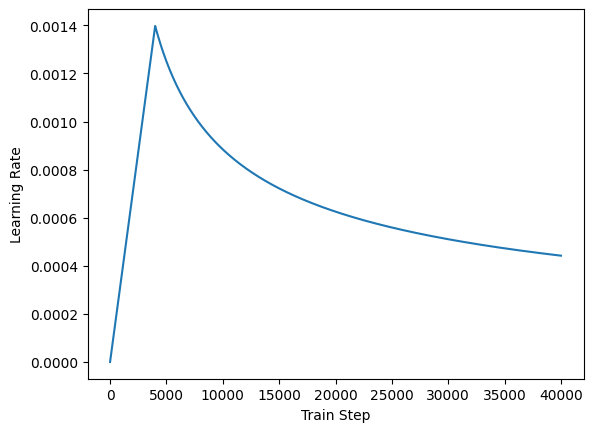

In [175]:
plt.plot(learning_rate(tf.range(40000, dtype=tf.float32)))
plt.ylabel('Learning Rate')
plt.xlabel('Train Step')

In [176]:
##################################################### Set up the loss and metrics ############################################

In [177]:
def masked_loss(label, pred):
  mask = label != 0
  loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')
  loss = loss_object(label, pred)

  mask = tf.cast(mask, dtype=loss.dtype)
  loss *= mask

  loss = tf.reduce_sum(loss)/tf.reduce_sum(mask)
  return loss


def masked_accuracy(label, pred):
  pred = tf.argmax(pred, axis=2)
  label = tf.cast(label, pred.dtype)
  match = label == pred

  mask = label != 0

  match = match & mask

  match = tf.cast(match, dtype=tf.float32)
  mask = tf.cast(mask, dtype=tf.float32)
  return tf.reduce_sum(match)/tf.reduce_sum(mask)

In [178]:
##################################################### Train the model ############################################

In [179]:
transformer.compile(
    loss=masked_loss,
    optimizer=optimizer,
    metrics=[masked_accuracy])

In [180]:
transformer.fit(train_dataset_batches,
                epochs=20,
                validation_data=validation_dataset_batches)

Epoch 1/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 591s 5s/step - loss: 9.6588 - masked_accuracy: 0.0084 - val_loss: 9.2751 - val_masked_accuracy: 0.0341
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 571s 5s/step - loss: 9.0390 - masked_accuracy: 0.0343 - val_loss: 8.2238 - val_masked_accuracy: 0.0341
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 559s 5s/step - loss: 7.9163 - masked_accuracy: 0.0343 - val_loss: 7.2068 - val_masked_accuracy: 0.0341
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 691s 6s/step - loss: 7.0333 - masked_accuracy: 0.0352 - val_loss: 6.8261 - val_masked_accuracy: 0.0422
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 648s 6s/step - loss: 6.7113 - masked_accuracy: 0.0533 - val_loss: 6.5662 - val_masked_accuracy: 0.0782
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 658s 6s/step - loss: 6.3712 - masked_accuracy: 0.0932 - val_loss: 6.1871 - val_masked_accuracy: 0.1256
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 647s 6s/step - loss: 5.9020 - masked_accuracy: 0.1478 - val_loss: 5.8122 - val_masked_accuracy: 0.1696

In [189]:
transformer.save_weights('w1.weights.h5')


In [ ]:
# transformer.load_weights('w1.weights.h5')


In [ ]:
# transformer.save('model')

In [ ]:
# from tensorflow.keras.models import load_model
# transformer = load_model('model')

In [190]:
transformer.fit(train_dataset_batches,
                epochs=5,  # số epoch bổ sung
                validation_data=validation_dataset_batches)


Epoch 1/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 698s 6s/step - loss: 1.8874 - masked_accuracy: 0.5991 - val_loss: 5.5626 - val_masked_accuracy: 0.2539
Epoch 2/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 852s 7s/step - loss: 1.7198 - masked_accuracy: 0.6238 - val_loss: 5.6252 - val_masked_accuracy: 0.2600
Epoch 3/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 883s 8s/step - loss: 1.5231 - masked_accuracy: 0.6587 - val_loss: 5.7721 - val_masked_accuracy: 0.2572
Epoch 4/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 637s 6s/step - loss: 1.3383 - masked_accuracy: 0.6908 - val_loss: 5.9775 - val_masked_accuracy: 0.2524
Epoch 5/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 601s 5s/step - loss: 1.1999 - masked_accuracy: 0.7126 - val_loss: 6.1120 - val_masked_accuracy: 0.2511


In [191]:
transformer.save_weights('w2.weights.h5')

In [192]:
transformer.fit(train_dataset_batches,
                epochs=2,  # bổ sung thêm 2 epochs
                validation_data=validation_dataset_batches)

Epoch 1/2
115/115 ━━━━━━━━━━━━━━━━━━━━ 612s 5s/step - loss: 1.0613 - masked_accuracy: 0.7404 - val_loss: 6.3136 - val_masked_accuracy: 0.2495
Epoch 2/2
115/115 ━━━━━━━━━━━━━━━━━━━━ 628s 5s/step - loss: 0.9495 - masked_accuracy: 0.7610 - val_loss: 6.4972 - val_masked_accuracy: 0.2440


In [193]:
transformer.fit(train_dataset_batches,
                epochs=2,  # bổ sung thêm 2 epochs
                validation_data=validation_dataset_batches)

Epoch 1/2
115/115 ━━━━━━━━━━━━━━━━━━━━ 617s 5s/step - loss: 0.8608 - masked_accuracy: 0.7793 - val_loss: 6.6345 - val_masked_accuracy: 0.2529
Epoch 2/2
115/115 ━━━━━━━━━━━━━━━━━━━━ 618s 5s/step - loss: 0.7958 - masked_accuracy: 0.7908 - val_loss: 6.7988 - val_masked_accuracy: 0.2539


In [194]:
transformer.fit(train_dataset_batches,
                epochs=1,  # bổ sung thêm 1 epochs
                validation_data=validation_dataset_batches)

115/115 ━━━━━━━━━━━━━━━━━━━━ 620s 5s/step - loss: 0.7451 - masked_accuracy: 0.8019 - val_loss: 6.9200 - val_masked_accuracy: 0.2518


In [197]:
transformer.save('model.keras')

In [181]:
# from tensorflow.keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# transformer.fit(train_dataset_batches,
#                 epochs=20,
#                 validation_data=validation_dataset_batches, callbacks=[early_stopping])

 early stopping: automatically stops the training process when the validation loss stops improving

In [182]:
##################################################### Run inference ############################################

In [199]:
MAX_TOKENS = 128 # start with this number

In [216]:
tokenizers = {
    'en': eng_text_tokenizer,
    'vi': vie_text_tokenizer
}


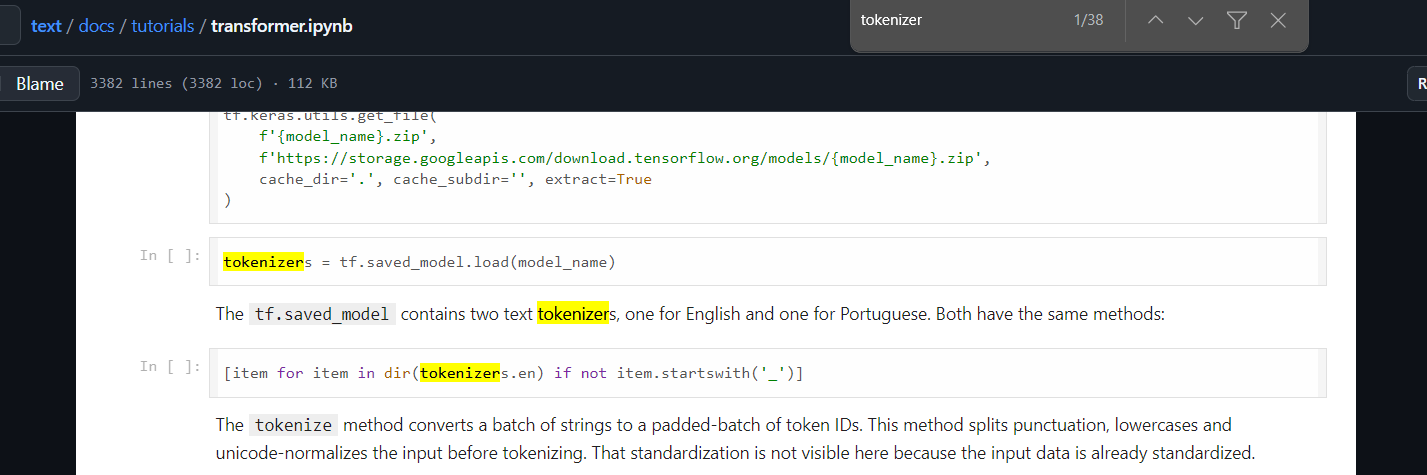

In [217]:
class Translator(tf.Module):
  def __init__(self, tokenizers, transformer):
    self.tokenizers = tokenizers
    self.transformer = transformer

  def __call__(self, sentence, max_length=MAX_TOKENS):
    # The input sentence is Vietnamese, hence adding the `[START]` and `[END]` tokens.
    assert isinstance(sentence, tf.Tensor)
    if len(sentence.shape) == 0:
      sentence = sentence[tf.newaxis]

    sentence = self.tokenizers.vi.tokenize(sentence).to_tensor()

    encoder_input = sentence

    # As the output language is English, initialize the output with the
    # English `[START]` token.
    start_end = self.tokenizers.en.tokenize([''])[0]
    start = start_end[0][tf.newaxis]
    end = start_end[1][tf.newaxis]

    # `tf.TensorArray` is required here (instead of a Python list), so that the
    # dynamic-loop can be traced by `tf.function`.
    output_array = tf.TensorArray(dtype=tf.int64, size=0, dynamic_size=True)
    output_array = output_array.write(0, start)

    for i in tf.range(max_length):
      output = tf.transpose(output_array.stack())
      predictions = self.transformer([encoder_input, output], training=False)

      # Select the last token from the `seq_len` dimension.
      predictions = predictions[:, -1:, :]  # Shape `(batch_size, 1, vocab_size)`.

      predicted_id = tf.argmax(predictions, axis=-1)

      # Concatenate the `predicted_id` to the output which is given to the
      # decoder as its input.
      output_array = output_array.write(i+1, predicted_id[0])

      if predicted_id == end:
        break

    output = tf.transpose(output_array.stack())
    # The output shape is `(1, tokens)`.
    text = tokenizers.en.detokenize(output)[0]  # Shape: `()`.

    tokens = tokenizers.en.lookup(output)[0]

    # `tf.function` prevents us from using the attention_weights that were
    # calculated on the last iteration of the loop.
    # So, recalculate them outside the loop.
    self.transformer([encoder_input, output[:,:-1]], training=False)
    attention_weights = self.transformer.decoder.last_attn_scores

    return text, tokens, attention_weights

In [218]:
translator = Translator(tokenizers, transformer)

In [219]:
def print_translation(sentence, tokens, ground_truth):
  print(f'{"Input:":15s}: {sentence}')
  print(f'{"Prediction":15s}: {tokens.numpy().decode("utf-8")}')
  print(f'{"Ground truth":15s}: {ground_truth}')

In [220]:
sentence = 'Xương rồng là một loại cây rất dễ thương.'
ground_truth = 'Cactus is a very cute plant.'

translated_text, translated_tokens, attention_weights = translator(
    tf.constant(sentence))
print_translation(sentence, translated_text, ground_truth)

AttributeError: 'dict' object has no attribute 'vi'